<a href="https://colab.research.google.com/github/GabrielMtzSoltero/SSPIAII/blob/main/07_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [4]:
#leer la imagen
img = mpimg.imread('sample_data/liz1.jpg')
#Normalizar la imagen como el valor de cada pixel va de 0 a 255 siendo 255 mayor presencia de ese color y 0 el ausencia
#y asi queda todo de 0 a 1
img = np.array(img, dtype=np.float64) / 255
#obtnemos las dimensiones de la imagen
#ancho, alto, y la profundidad que en este caso es el numero de canales (3 por ser RGB)
h,w, d = img.shape
n_classes = 8
#un reshape para tener un vector con los valores de cada canal
img_array = np.reshape(img, (w * h, d))
#revolvemos los datos y tomamos los primero 1000 valores
image_array_sample = shuffle(img_array, random_state=0)[:1000]
#creamos nuestro modelo para el Kmeans con 8 clusters en este caso
kmeans = KMeans(n_clusters = n_classes, random_state = 0).fit(image_array_sample)
#imprimimos los centroides de cada clusters
#como veran en el print hay 8 centroides para cada canal
print("Centroides por cada canal")
print(kmeans.cluster_centers_)

Centroides por cada canal
[[0.45       0.52997199 0.52535014]
 [0.64303473 0.04941689 0.11000897]
 [0.87522059 0.88914216 0.87480392]
 [0.41635507 0.28375133 0.20379997]
 [0.88673163 0.65107663 0.5039336 ]
 [0.68900972 0.73092767 0.71425276]
 [0.21044653 0.10894711 0.0740814 ]
 [0.68056688 0.43471171 0.32545137]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
#hacemos la prediccion de la imagen completa
#lo que nos devolvera la clase a la que corresponde cada pixel en cada canal
labels = kmeans.predict(img_array)

img_labels_per_channel = np.reshape(labels, (h,w))
#creamos una matriz de ceros para guardar el valor del centroide que se le asigno
img_out = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        img_out[i][j][0] = kmeans.cluster_centers_[img_labels_per_channel[i][j]][0]
        img_out[i][j][1] = kmeans.cluster_centers_[img_labels_per_channel[i][j]][1]
        img_out[i][j][2] = kmeans.cluster_centers_[img_labels_per_channel[i][j]][2]


In [6]:
#Tambien se puede hacer que solo 8 centroides para todo los canales
img_array = np.reshape(img, (w * h* d,1))
#revolvemos los datos y tomamos los primero 1000 valores
image_array_sample = shuffle(img_array, random_state=0)[:1000]
#creamos nuestro modelo para el Kmeans con 8 clusters en este caso
kmeans2 = KMeans(n_clusters = n_classes, random_state = 0).fit(image_array_sample)

#imprimimos los centroides de cada clusters
#como veran en el print hay 8 centroides para todos los datos
print("\nCentroides para todos los canales")
print(kmeans2.cluster_centers_)

#hacemos la prediccion de la imagen completa
#lo que nos devolvera la clase a la que corresponde cada pixel
labels = kmeans2.predict(img_array)


img_out_wo_channels = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        for k in range(d):
            img_out_wo_channels[i][j][k] = kmeans2.cluster_centers_[labels[i*w*d+j*d+k]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Centroides para todos los canales
[[0.8184739 ]
 [0.18681542]
 [0.56892404]
 [0.05687523]
 [0.93551577]
 [0.44719764]
 [0.69217139]
 [0.31600894]]


<ipython-input-6-8c60ce0e0463>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_out_wo_channels[i][j][k] = kmeans2.cluster_centers_[labels[i*w*d+j*d+k]]


clase para el pixel en la fila 374, columna 577
0
valor para cada canal
[0.45       0.52997199 0.52535014]
clase y valor para el pixel en la fila 374, columna 577 en el canal R
3 [0.05687523]
clase y valor para el pixel en la fila 374, columna 577 en el canal G
5 [0.44719764]
clase y valor para el pixel en la fila 374, columna 577 en el canal B
6 [0.69217139]


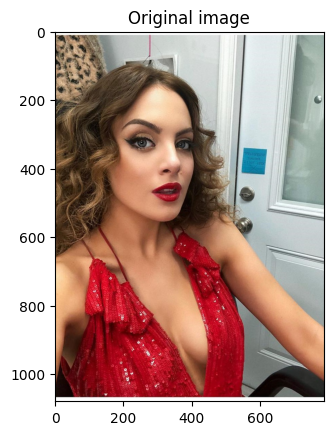

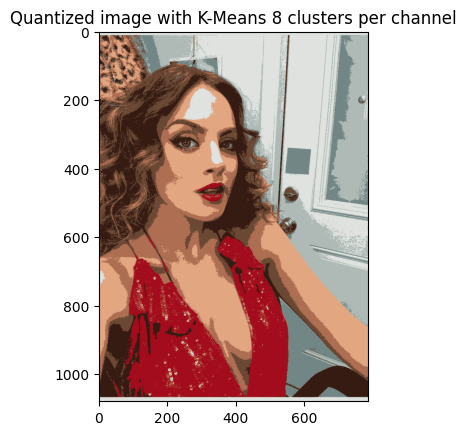

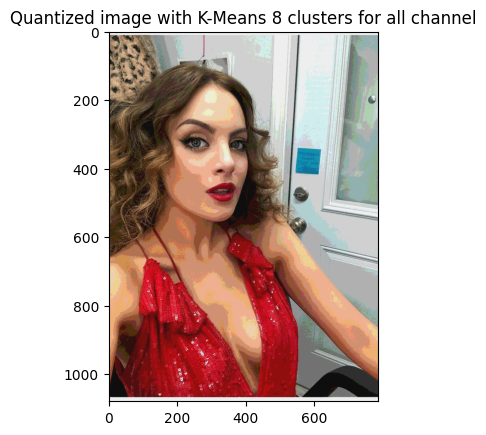

In [7]:
plt.figure()
plt.title('Original image')
plt.imshow(img)
plt.figure()
plt.title('Quantized image with K-Means 8 clusters per channel')
plt.imshow(img_out)
plt.figure()
plt.title('Quantized image with K-Means 8 clusters for all channel')
plt.imshow(img_out_wo_channels)
print("clase para el pixel en la fila 374, columna 577")
print(img_labels_per_channel[374][577])
print("valor para cada canal")
print(kmeans.cluster_centers_[img_labels_per_channel[374][577]])
print("clase y valor para el pixel en la fila 374, columna 577 en el canal R")
print(labels[374*w*d+577*d+0],kmeans2.cluster_centers_[labels[374*w*d+577*d+0]])
print("clase y valor para el pixel en la fila 374, columna 577 en el canal G")
print(labels[374*w*d+577*d+1],kmeans2.cluster_centers_[labels[374*w*d+577*d+1]])
print("clase y valor para el pixel en la fila 374, columna 577 en el canal B")
print(labels[374*w*d+577*d+2],kmeans2.cluster_centers_[labels[374*w*d+577*d+2]])
